What is Dementia?

Dementia is a general term for a decline in mental ability severe enough to interfere with daily life. Memory loss is an example. Dementia is not a specific disease. It's an overall term that describes a group of symptoms associated with a decline in memory or other thinking skills severe enough to reduce a person's ability to perform everyday activities.


Diagnosis of dementia

There is no one test to determine if someone has dementia. Doctors diagnose Alzheimer's and other types of dementia based on a careful medical history, a physical examination, laboratory tests, and the characteristic changes in thinking, day-to-day function and behavior associated with each type. Doctors can determine that a person has dementia with a high level of certainty. But it's harder to determine the exact type of dementia because the symptoms and brain changes of different dementias can overlap. In some cases, a doctor may diagnose "dementia" and not specify a type. If this occurs it may be necessary to see a specialist such as a neurologist or gero-psychologist.


Understanding the data

summary: This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit


What do variables stand for ?

It consists of 15 attributes which are describes as follows :

    Subject.ID - Unique Id of the patient
    MRI.ID - Unique Id generated after conducting MRI on patient
    Group - It is a group of Converted (Previously Normal but developed dimentia later), Demented and Nondemented (Normal Pateints)
    Visit - Number of visit to detect dementia status
    MR.Delay - Not Known

1.  Demographics Info
    Gender : M/F
    Education
    M.F - Gender
    Hand - Handedness (actually all subjects were right-handed so I will drop this column)
    Age - Age in years
    EDUC - Years of education
    SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

2.  Clinical Information

    MMSE - Mini-Mental State Examination score _(range is from 0 = worst to 30 = best) _
    CDR - Clinical Dementia Rating _(0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)_
    eTIV - Estimated total intracranial volume, mm3
    nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
    ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix


Interpretations

Any score greater than or equal to 24 points (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment. The raw score may also need to be corrected for educational attainment and age. That is, a maximal score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing. The presence of purely physical problems can also interfere with interpretation if not properly noted; for example, a patient may be physically unable to hear or read instructions properly, or may have a motor deficit that affects writing and drawing skills.

Clinical Dementia Rating (CDR)The CDR™ in one aspect is a 5-point scale used to characterize six domains of cognitive and functional performance applicable to Alzheimer disease and related dementias: Memory, Orientation, Judgment & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care. The necessary information to make each rating is obtained through a semi-structured interview of the patient and a reliable informant or collateral source (e.g., family member) referred to as the CDR™ Assessment Protocol.

The CDR™ Scoring Table provides descriptive anchors that guide the clinician in making appropriate ratings based on interview data and clinical judgment. In addition to ratings for each domain, an overall CDR™ score may be calculated through the use of an CDR™ Scoring Algorithm. This score is useful for characterizing and tracking a patient's level of impairment/dementia:

0 = Normal
0.5 = Very Mild Dementia
1 = Mild Dementia
2 = Moderate Dementia
3 = Severe Dementia
Estimated total intracranial volume (eTIV)

Mini–Mental State Examination

The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR), MR and Diffusion Tensor Imaging (DTI), MR and Single-photon Emission Computed Tomography (SPECT), Ultrasound and Computed Tomography (CT). ICV consistency during aging makes it a reliable tool for correction of head size variation across subjects in studies that rely on morphological features of the brain. ICV, along with age and gender are reported as covariates to adjust for regression analyses in investigating progressive neurodegenerative brain disorders, such as Alzheimer's disease, aging and cognitive impairment. ICV has also been utilized as an independent voxel based morphometric feature to evaluate age-related changes in the structure of premorbid brain, determine characterizing atrophy patterns in subjects with mild cognitive impairment (MCI) and Alzheimer's disease (AD), delineate structural abnormalities in the white matter (WM) in schizophrenia, epilepsy, and gauge cognitive efficacy.


Analysis Approach

1. Data Cleaning

2. Univariate Analysis

3. Key Insights


IMPORTING NECESSARY MODELS


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import statsmodels
import statsmodels.api as sm
# import train-test split 
from sklearn.model_selection import train_test_split
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
#from xgboost import XGBClassifier


DATA PROCESSING BEGINS HERE


WE READ THE DATA FROM THE COMMA SEPARATED VARIABLE (CSV) FILE


In [2]:

df_dementia=pd.read_csv('C:\\Users\\Gaayuoni Joseph\\Desktop\\oasis_longitudinal.csv')
df_dementia.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


After seeing the summary stats we observe that Hand feature has only one unique value whereas Subject ID and MRI ID is of no use in our analysis so we will drop these three columns from the dataset.


In [3]:
# drop any irrelevant column from the dataset
df_dementia=df_dementia.drop(['Subject ID','MRI ID','Hand'],axis=1)
df_dementia.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:

df_dementia1=df_dementia

In [5]:
df_dementia1.shape

(373, 12)

In [6]:
# This list all the datatypes present in the table
df_dementia1.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [7]:

df_dementia1.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
df_dementia1.describe(include='object')

,Group,M/F
count,373,373
unique,3,2
top,Nondemented,F
freq,190,213


In [9]:
# This checks for any missing value in each column
df_dementia1.isnull().sum()


Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

Here the we see that SES and MMSE have null values therefor we must replace them with either the mean value or the median value

In [10]:
df_dementia1.SES.describe()

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [11]:
df_dementia1.SES.mode()

0    2.0
Name: SES, dtype: float64

In [12]:
df_dementia1.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

SES have only integer values so have to replace it with median or the mode

In [13]:
df_dementia1.SES.mean()

2.4604519774011298

In [14]:
df_dementia1.SES.median()

2.0

In [15]:
df_dementia1.MMSE.mode()

0    30.0
Name: MMSE, dtype: float64

The median and mean is close to 2 as such we can replace missing values with 2

In [16]:
df_dementia1.MMSE.unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [17]:
df_dementia1.MMSE.describe()

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [18]:
df_dementia1["SES"].fillna(df_dementia1["SES"].median(), inplace=True)
df_dementia1["MMSE"].fillna(df_dementia1["MMSE"].median(), inplace=True)

<AxesSubplot:>

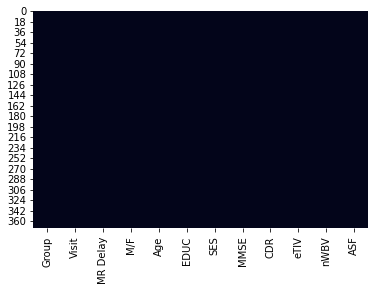

In [19]:
sns.heatmap(data=df_dementia1.isnull(),cbar=False)

There sre no record of missing values 

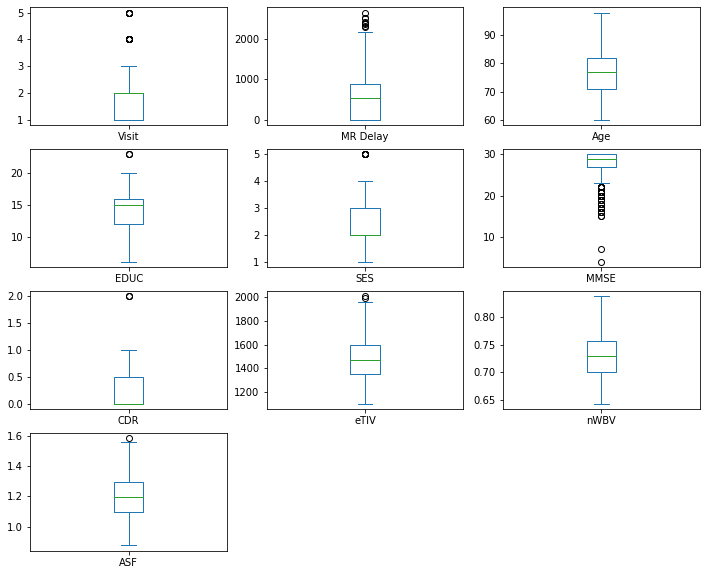

In [20]:
df_dementia1.plot(kind='box',figsize=(12,10),subplots=True,layout=(4,3))
plt.show()


All the columns have outliers except nWBV and Age

In [21]:
df_dementia1.drop(["Visit","MR Delay"],axis=1,inplace=True)

In [22]:
df_dementia1["Group"].replace({"Nondemented":0,"Demented":1},inplace=True)

In [23]:
df_dementia1["M/F"].replace({"M":0,"F":1},inplace=True)

In [24]:
df_dementia1.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [25]:
df_dementia1.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


HERE WE EXPLORE THE DATA


In [26]:
# Defining function to create pie chart and bar plot as subplots

def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = df_dementia1[var].unique().tolist()
  df_dementia1[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = df_dementia[var].value_counts().plot(kind="barh")

  for i,j in enumerate(df_dementia1[var].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)
  plt.title("Count of "+ var +" cases")
  plt.show()

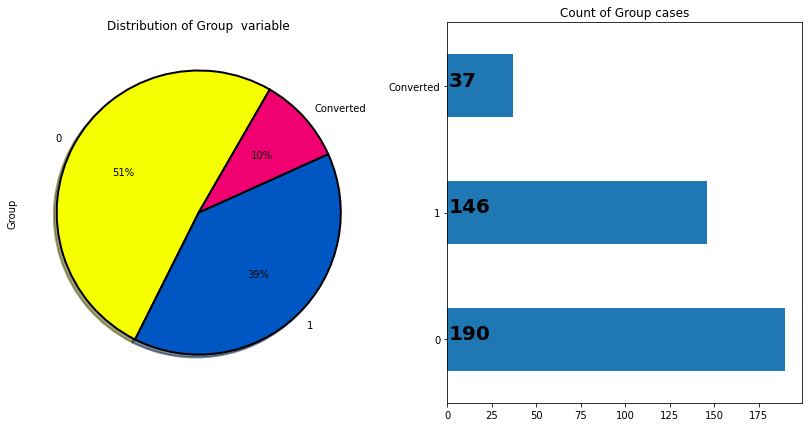

In [27]:
plot_piechart("Group")

39% are demented, 51% are nondemented and the remaining 10% are converted


In [28]:
df_dementia1['Group'].describe()

count     373
unique      3
top         0
freq      190
Name: Group, dtype: int64

In [29]:
df_dementia1['CDR'].describe()

count    373.000000
mean       0.290885
std        0.374557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        2.000000
Name: CDR, dtype: float64

In [30]:
# Plotting CDR with other variable
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df_dementia1.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_dementia1.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()

    # Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

<AxesSubplot:xlabel='CDR', ylabel='count'>

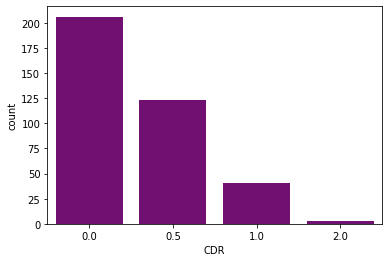

In [31]:
sns.countplot(x='CDR',data=df_dementia1,color="purple")

Here we are classifying them from higher to lower clinical dementia rating so 0.0 is the highest dementia rating

In [32]:
df_dementia1['CDR'] = df_dementia1['CDR'].apply(lambda x: cat_CDR(x))

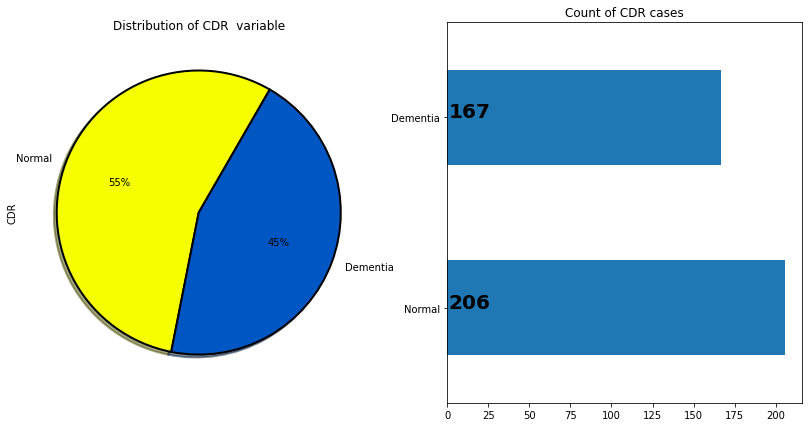

In [33]:
plot_piechart('CDR')

Text(0.5, 1.0, 'Countplot for MMSE Values')

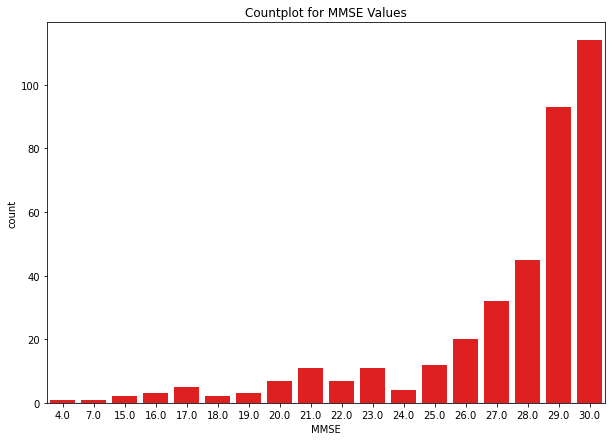

In [34]:

plt.figure(figsize=(10,7))
sns.countplot(x='MMSE',data=df_dementia1,color="red")
plt.title("Countplot for MMSE Values")

In [35]:
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                   
        return 'Mild'

In [36]:
df_dementia1['MMSE'] = df_dementia1['MMSE'].apply(lambda x: cat_MMSE(x))

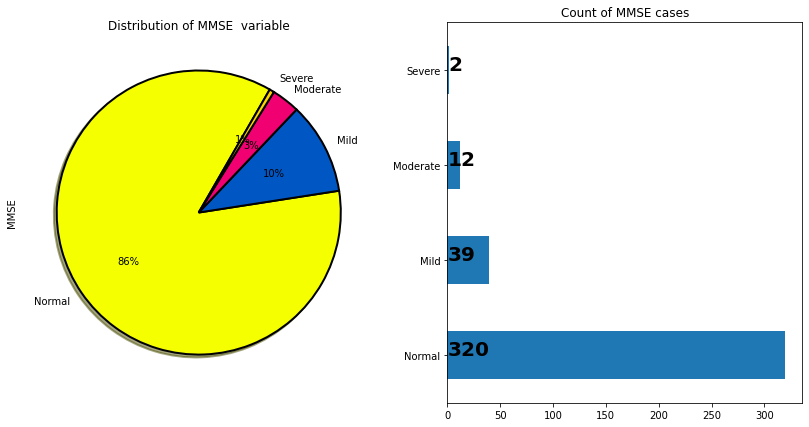

In [37]:
plot_piechart('MMSE')


Normal MMSE is highest at 86%

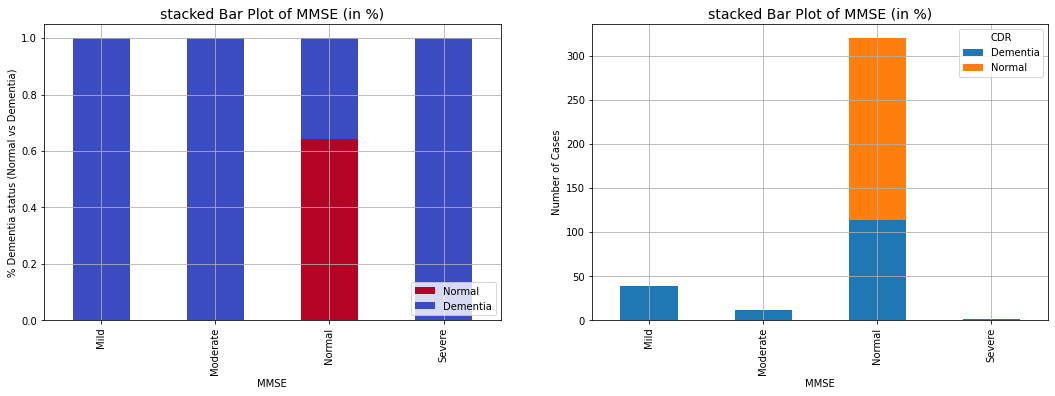

In [38]:
univariate_percent_plot('MMSE')

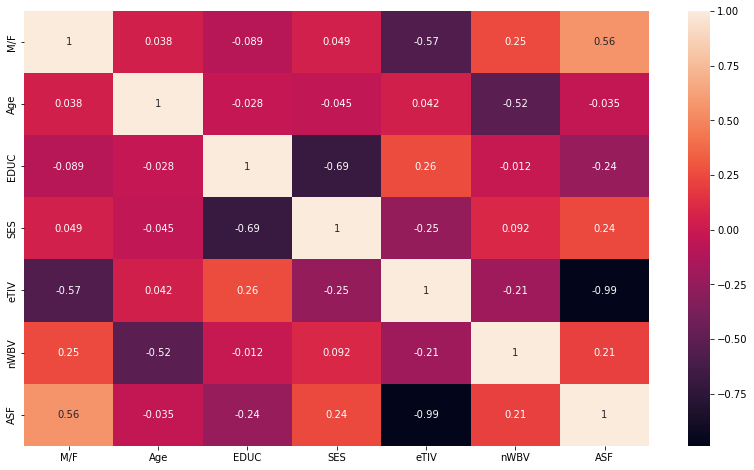

In [39]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_dementia1.corr(), annot=True)
plt.show()

As we can see Visit and MR Delay are showing close correlation to 0.92. As we can see from the above plot, there are around 40% of the cases in Normal MMSE status are of dementia cases accroding to CDR scoring.

c:\Users\Gaayuoni Joseph\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

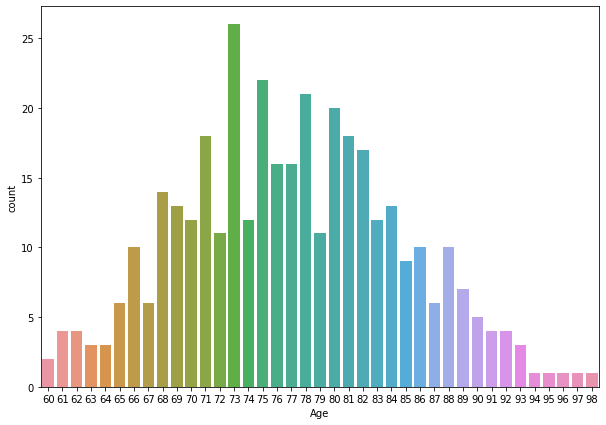

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(df_dementia1['Age'])

Here we see that most of the people are  73 years of age

In [41]:
df_dementia1['age_group'] = pd.cut(df_dementia1['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_dementia1['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

In [42]:
df_dementia1['age_group'] = pd.cut(df_dementia1['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_dementia1['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

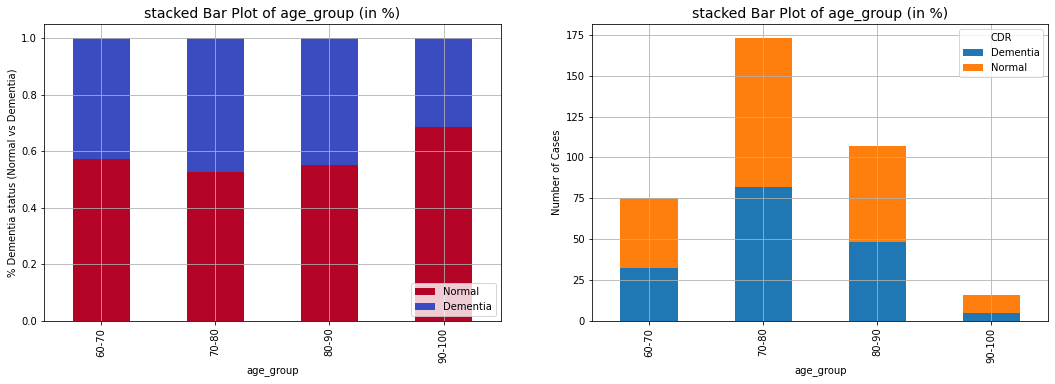

In [43]:
univariate_percent_plot('age_group')

Most of the people here are within the age range of 70 -80

Here we can observe that most of the people within the age range 70 - 80  are demented

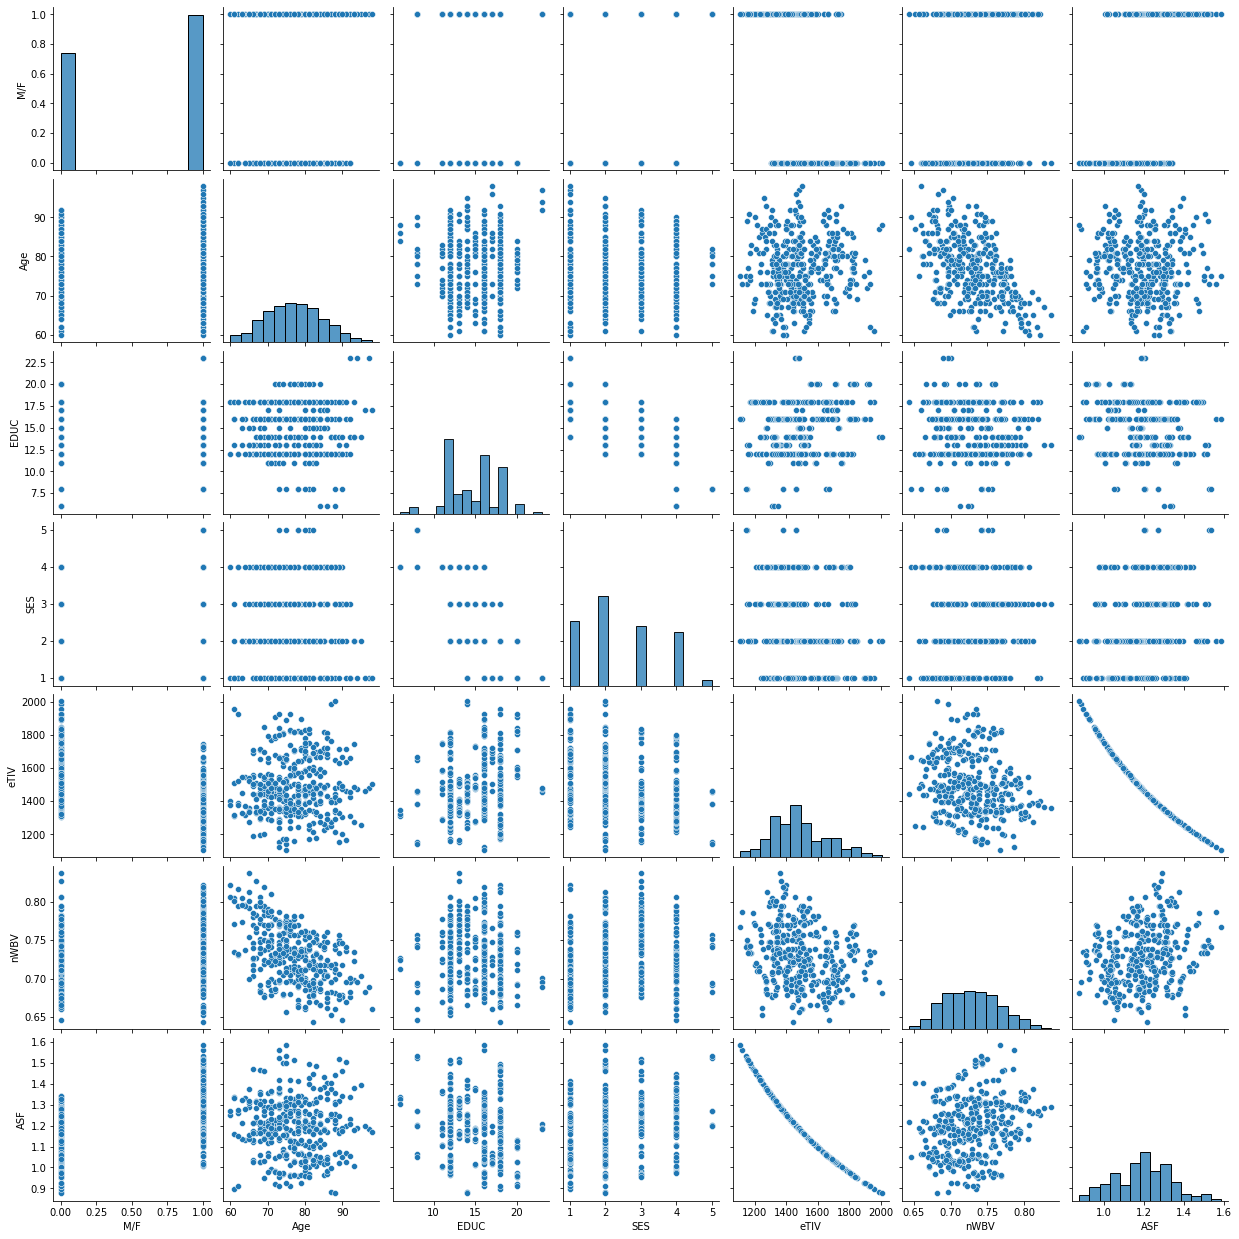

In [44]:
sns.pairplot(df_dementia1)
plt.show()

In [45]:
X=df_dementia1.drop(["Group"],axis=1)
y=df_dementia1["Group"]

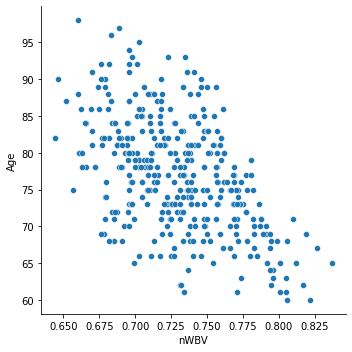

In [46]:
sns.relplot(x="nWBV", y="Age", data=df_dementia1);

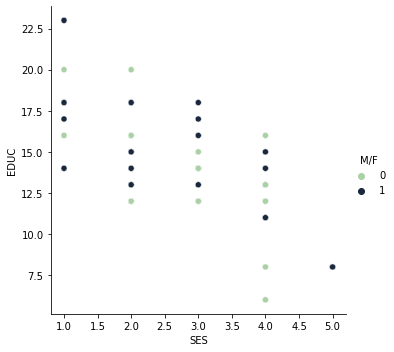

In [47]:
sns.relplot(x="SES", y="EDUC", hue="M/F", palette="ch:r=-.5,l=.75", data=df_dementia1)

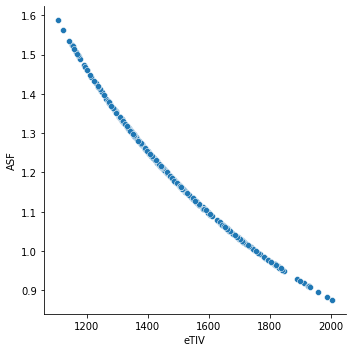

In [48]:
sns.relplot(x="eTIV", y="ASF", palette="ch:r=-.5,l=.75", data=df_dementia1)

<AxesSubplot:title={'center':'Stacked bar plot'}, xlabel='Group'>

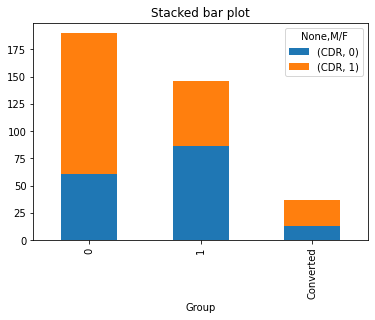

In [49]:
stack=pd.pivot_table(df_dementia1,index=['Group'],columns=['M/F'],values=['CDR'],aggfunc='count')
stack.plot.bar(title='Stacked bar plot',stacked=True)

Men are more prone to dementia as opossed to women

In [52]:
df_dementia1["Group"].value_counts()

0            190
1            146
Converted     37
Name: Group, dtype: int64

In [53]:
X=df_dementia1.drop(["Group"],axis=1)
y=df_dementia1["Group"]

In [56]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image  